In [1]:
import sys
sys.path.append('/home/ZhiLi/CRESTHH')
from cresthh.anuga import SWW_plotter
import numpy as np
import pandas as pd
%matplotlib inline
import geopandas as gpd
from cresthh.utils import flowAreaCalc as flow_area
from cresthh.utils import processSWW
from cresthh import metrics as met
from cresthh import anuga
from netCDF4 import Dataset
from glob import glob
from osgeo import gdal
from pyproj import Proj, CRS, transform

# Allow inline jshtml animations
from matplotlib import rc
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
rc('animation', html='jshtml')

In [2]:
sys.path.append('/home/ZhiLi/PlotGallory')
from matplotlibconfig import basic
basic()

# 1D streamflow

In [3]:
OUTLET=(284219.573,3302832.615)
crosssection= gpd.read_file('/home/ZhiLi/CRESTHH/data/crosssection/08076700.shp')

In [4]:
benchmark= processSWW('Coupled_10m_modified_mesh.sww', ['depth','speed','stage'], OUTLET, start_time=pd.to_datetime('20170825000000'))
coupled_30m= processSWW('Coupled_30m_modified_mesh.sww', ['depth','speed','stage'], OUTLET, start_time=pd.to_datetime('20170825000000'))
noncoupled_10m= processSWW('nonCoupled_10m_modified_mesh.sww', ['depth','speed','stage'], OUTLET, start_time=pd.to_datetime('20170825000000'))
coupled_noConstraint=processSWW('Coupled_10m_no_constraint_mesh.sww', ['depth','speed','stage'], OUTLET, start_time=pd.to_datetime('20170825000000'))
coupled_FAM= processSWW('Coupled_10m_flow_acc_mesh.sww', ['depth','speed','stage'], OUTLET, start_time=pd.to_datetime('20170825000000'))
infil=processSWW('Coupled_10m_modified_mesh_infiltration.sww', ['depth','speed','stage'], OUTLET, start_time=pd.to_datetime('20170825000000'))
soil= processSWW('Coupled_10m_modified_mesh_Ksat.sww', ['depth','speed','stage'], OUTLET, start_time=pd.to_datetime('20170825000000'))
saturated= processSWW('Coupled_10m_modified_mesh_saturated.sww', ['depth','speed','stage'], OUTLET, start_time=pd.to_datetime('20170825000000'))

Figure files for each frame will be stored in _plot
Figure files for each frame will be stored in _plot
Figure files for each frame will be stored in _plot
Figure files for each frame will be stored in _plot
Figure files for each frame will be stored in _plot
Figure files for each frame will be stored in _plot
Figure files for each frame will be stored in _plot
Figure files for each frame will be stored in _plot


In [5]:
benchmark['area']= benchmark.apply(lambda x: flow_area(crosssection, x.stage), axis=1)
noncoupled_10m['area']= noncoupled_10m.apply(lambda x: flow_area(crosssection, x.stage), axis=1)
coupled_30m['area']= coupled_30m.apply(lambda x: flow_area(crosssection, x.stage), axis=1)
coupled_FAM['area']= coupled_FAM.apply(lambda x: flow_area(crosssection, x.stage), axis=1)
coupled_noConstraint['area']= coupled_noConstraint.apply(lambda x: flow_area(crosssection, x.stage), axis=1)
infil['area']= infil.apply(lambda x: flow_area(crosssection, x.stage), axis=1)
soil['area']= soil.apply(lambda x: flow_area(crosssection, x.stage), axis=1)
saturated['area']= saturated.apply(lambda x: flow_area(crosssection, x.stage), axis=1)

In [6]:
benchmark['Q']= benchmark.speed * benchmark.area
noncoupled_10m['Q']= noncoupled_10m.speed * noncoupled_10m.area
coupled_30m['Q']= coupled_30m.speed * coupled_30m.area
coupled_FAM['Q']= coupled_FAM.speed * coupled_FAM.area
coupled_noConstraint['Q']= coupled_noConstraint.speed * coupled_noConstraint.area
infil['Q']= infil.speed * infil.area
soil['Q']= soil.speed * soil.area
saturated['Q']= saturated.speed * saturated.area

In [ ]:
from netCDF4 import Dataset
import matplotlib.tri as mtri
def interpolate(swwfile, xi, yi):
    nc= Dataset(swwfile)
    depth= nc['stage'][:].max(axis=0)- nc['elevation'][:]
#     interp_lin = mtri.CubicTriInterpolator(triang, z, kind='geom')
    triangles= nc['volumes'][:]
    x= nc['x'][:]
    y=nc['y'][:]
    triang= mtri.Triangulation(x, y, triangles)
    interp_lin = mtri.CubicTriInterpolator(triang, depth, kind='geom')
    xi,yi= np.meshgrid(xi,yi)
    zi_lin = interp_lin(xi, yi)
    
    return xi, yi, zi_lin

In [ ]:
boundary= gpd.read_file('/home/ZhiLi/mesher/examples/08076700_new/stream_dem/DEM_10m/line_DEM_10m.shp')
x= np.array(boundary.geometry[0].coords)[:,0]-benchmarkSplotter.xllcorner
y=np.array(boundary.geometry[0].coords)[:,1]-benchmarkSplotter.yllcorner

# Level 1: Model engine

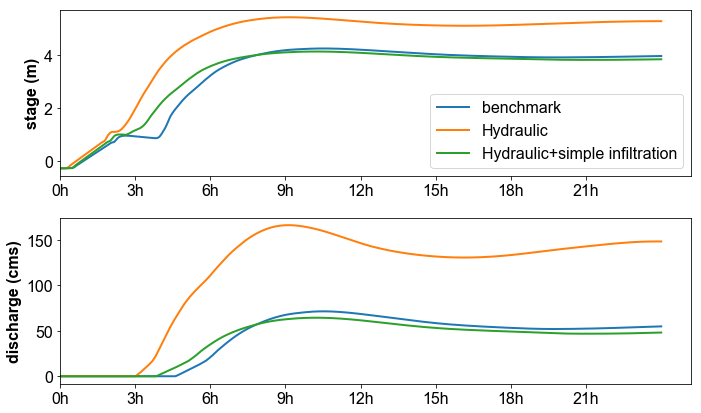

In [55]:
fig= plt.figure(figsize=(10,6))
ax= fig.add_subplot(211)
ax.plot(benchmark.stage.values, label='benchmark')
ax.plot(noncoupled_10m.stage.values, label='Hydraulic')
ax.plot(infil.stage.values, label='Hydraulic+simple infiltration')
ax.set_xticks(np.arange(0,24*30,3*30))
ax.set_xticklabels(['%dh'%i for i in np.arange(0,24,3)])
ax.set_xlim([0,None])
ax.set_ylabel('stage (m)')
plt.legend(fontsize=16);
ax= fig.add_subplot(212)
ax.plot(benchmark.Q.values, label='benchmark')
ax.plot(noncoupled_10m.Q.values, label='Hydraulic')
ax.plot(infil.Q.values, label='Hydraulic+simple infiltration')
ax.set_xticks(np.arange(0,24*30,3*30))
ax.set_xticklabels(['%dh'%i for i in np.arange(0,24,3)])
ax.set_xlim([0,None])
ax.set_ylabel('discharge (cms)');
# plt.xticks(np.arange(0,24,3), ['%dh'%i for i in np.arange(0,24,3)])


In [357]:
xi,yi,MD_benchmark= interpolate('Coupled_10m_modified_mesh.sww', np.arange(0,38000,10), np.arange(0,25000,10))
xi,yi,MD_estimator= interpolate('Coupled_10m_modified_mesh_infiltration.sww', np.arange(0,38000,10), np.arange(0,25000,10))

In [358]:
MD_benchmark=MD_benchmark.filled(np.nan)
MD_estimator=MD_estimator.filled(np.nan)

In [359]:
# MD_benchmark= MD_benchmark.filled(np.nan)
# MD_estimator= MD_benchmark.filled(np.nan)
new_field= np.zeros(MD_benchmark.shape)
rows,cols= np.where((MD_benchmark>0.2) & (MD_estimator>0.2) & (~np.isnan(MD_estimator)) & (~np.isnan(MD_benchmark)))
new_field[rows, cols]=3
rows,cols= np.where((MD_benchmark>0.2) & (MD_estimator<=0.2)& (~np.isnan(MD_estimator)) & (~np.isnan(MD_benchmark)))
new_field[rows, cols]=2
rows,cols= np.where((MD_benchmark<=0.2) & (MD_estimator>0.2)& (~np.isnan(MD_estimator)) & (~np.isnan(MD_benchmark)))
new_field[rows, cols]=1

new_field[np.isnan(MD_benchmark)]=np.nan

# new_field[mask_misses]=2
# new_field[mask_false]=1

hits_p= float((new_field==3).sum())/((~np.isnan(new_field)).sum())*100.
misses_p= float((new_field==2).sum())/((~np.isnan(new_field)).sum())*100.
false_p= float((new_field==1).sum())/((~np.isnan(new_field)).sum())*100.
neg_p = float((new_field==0).sum())/((~np.isnan(new_field)).sum())*100.

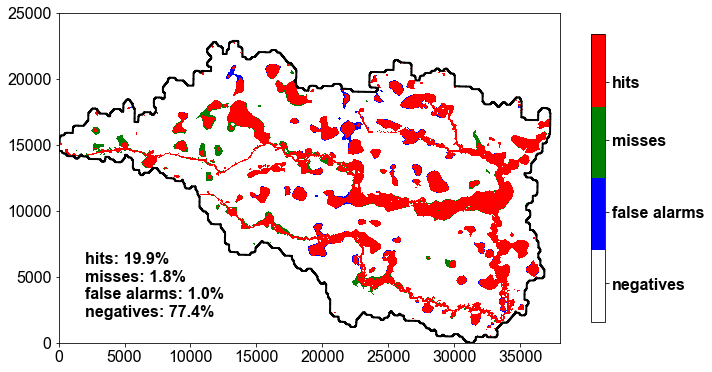

In [360]:
cmap = ListedColormap(['white', 'b', 'g', 'r'])
fig=plt.figure(figsize=(10,6))
# estimator.triang.set_mask(estimator.depth.max(axis=0) <=0.2)
plt.imshow(new_field, origin='lower left', cmap=cmap, extent=[xi.min(), xi.max(),yi.min(),yi.max()])
cbar= plt.colorbar(ticks=[0.4,1.15,1.9,2.5], shrink=0.7)
# cbar.ax.set_yticks([1.25,2.00,2.75])
cbar.ax.set_yticklabels(['negatives','false alarms','misses','hits'], weight='bold')
plt.text(2000,2000,'hits: %.1f%s\nmisses: %.1f%s\nfalse alarms: %.1f%s\nnegatives: %.1f%s'%(hits_p,'%', misses_p,'%', false_p,'%', 100-hits_p-misses_p-false_p,'%'), fontsize=16, weight='bold')
plt.plot(x, y, 'k');

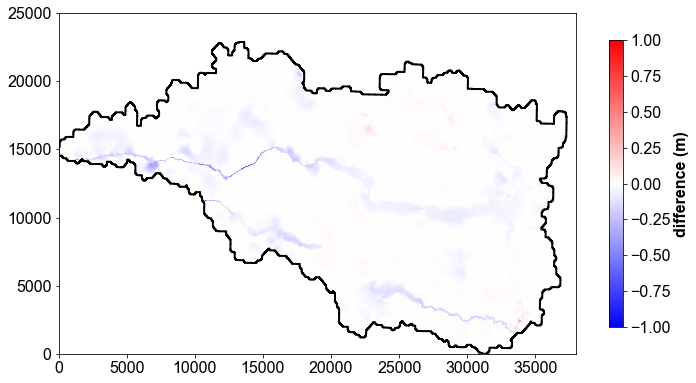

In [361]:
difference= MD_estimator- MD_benchmark
fig=plt.figure(figsize=(10,6))
plt.imshow(difference, origin='lower left', cmap='bwr', vmin=-1, vmax=1, extent=[xi.min(), xi.max(),yi.min(),yi.max()])
cbar= plt.colorbar(shrink=0.7)
cbar.ax.set_ylabel('difference (m)')
plt.plot(x, y, 'k');

# Level 2: Mesh

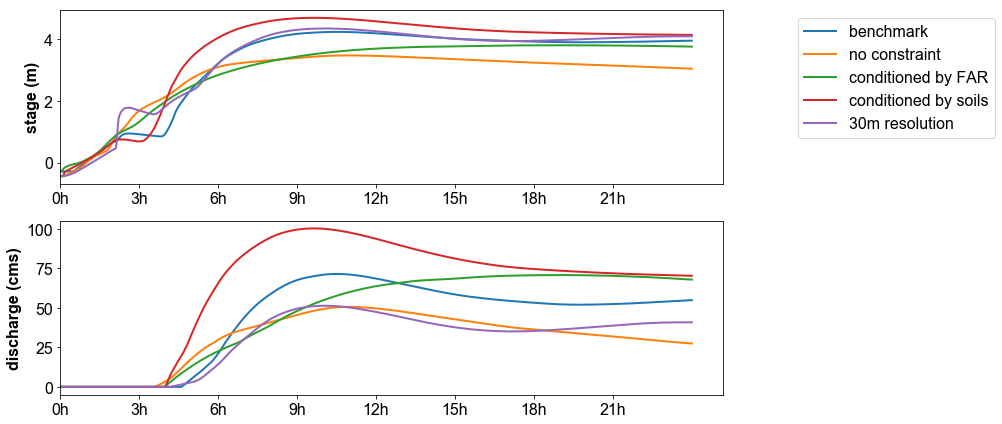

In [197]:
fig= plt.figure(figsize=(14,6))
ax= fig.add_subplot(211)
ax.plot(benchmark.stage.values, label='benchmark')
ax.plot(coupled_noConstraint.stage.values, label='no constraint')
ax.plot(coupled_FAM.stage.values, label='conditioned by FAR')
ax.plot(soil.stage.values, label='conditioned by soils')
ax.plot(coupled_30m.stage.values, label='30m resolution')
ax.set_xticks(np.arange(0,24*30,3*30))
ax.set_xticklabels(['%dh'%i for i in np.arange(0,24,3)])
ax.set_xlim([0,None])
ax.set_ylabel('stage (m)')
plt.legend(fontsize=16, bbox_to_anchor=(1.1,1));
ax= fig.add_subplot(212)
ax.plot(benchmark.Q.values, label='benchmark')
ax.plot(coupled_noConstraint.Q.values, label='no constraint')
ax.plot(coupled_FAM.Q.values, label='conditioned by FAR')
ax.plot(soil.Q.values, label='conditioned by soils')
ax.plot(coupled_30m.Q.values, label='30m resolution')
ax.set_xticks(np.arange(0,24*30,3*30))
ax.set_xticklabels(['%dh'%i for i in np.arange(0,24,3)])
ax.set_xlim([0,None])
ax.set_ylabel('discharge (cms)');
# plt.xticks(np.arange(0,24,3), ['%dh'%i for i in np.arange(0,24
,3)]);


In [344]:
xi,yi,MD_benchmark= interpolate('Coupled_10m_modified_mesh.sww', np.arange(0,38000,10), np.arange(0,25000,10))
xi,yi,MD_estimator= interpolate('Coupled_10m_modified_mesh_Ksat.sww', np.arange(0,38000,10), np.arange(0,25000,10))

In [345]:
MD_benchmark=MD_benchmark.filled(np.nan)
MD_estimator=MD_estimator.filled(np.nan)

In [346]:
# MD_benchmark= MD_benchmark.filled(np.nan)
# MD_estimator= MD_benchmark.filled(np.nan)
new_field= np.zeros(MD_benchmark.shape)
rows,cols= np.where((MD_benchmark>0.2) & (MD_estimator>0.2) & (~np.isnan(MD_estimator)) & (~np.isnan(MD_benchmark)))
new_field[rows, cols]=3
rows,cols= np.where((MD_benchmark>0.2) & (MD_estimator<=0.2)& (~np.isnan(MD_estimator)) & (~np.isnan(MD_benchmark)))
new_field[rows, cols]=2
rows,cols= np.where((MD_benchmark<=0.2) & (MD_estimator>0.2)& (~np.isnan(MD_estimator)) & (~np.isnan(MD_benchmark)))
new_field[rows, cols]=1

new_field[np.isnan(MD_benchmark)]=np.nan

# new_field[mask_misses]=2
# new_field[mask_false]=1

hits_p= float((new_field==3).sum())/((~np.isnan(new_field)).sum())*100.
misses_p= float((new_field==2).sum())/((~np.isnan(new_field)).sum())*100.
false_p= float((new_field==1).sum())/((~np.isnan(new_field)).sum())*100.
neg_p = float((new_field==0).sum())/((~np.isnan(new_field)).sum())*100.

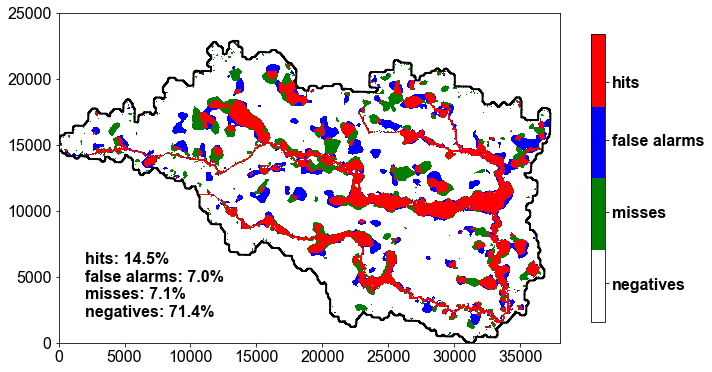

In [347]:
cmap = ListedColormap(['white', 'b', 'g', 'r'])
fig=plt.figure(figsize=(10,6))
# estimator.triang.set_mask(estimator.depth.max(axis=0) <=0.2)
plt.imshow(new_field, origin='lower left', cmap=cmap, extent=[xi.min(), xi.max(),yi.min(),yi.max()])
cbar= plt.colorbar(ticks=[0.4,1.15,1.9,2.5], shrink=0.7)
# cbar.ax.set_yticks([1.25,2.00,2.75])
cbar.ax.set_yticklabels(['negatives','false alarms','misses','hits'], weight='bold')
plt.text(2000,2000,'hits: %.1f%s\nmisses: %.1f%s\nfalse alarms: %.1f%s\nnegatives: %.1f%s'%(hits_p,'%', misses_p,'%', false_p,'%', 100-hits_p-misses_p-false_p,'%'), fontsize=16, weight='bold')
plt.plot(x, y, 'k');

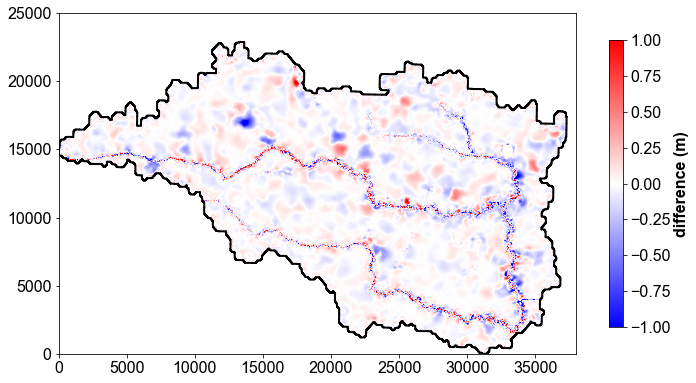

In [348]:
difference= MD_estimator- MD_benchmark
fig=plt.figure(figsize=(10,6))
plt.imshow(difference, origin='lower left', cmap='bwr', vmin=-1, vmax=1, extent=[xi.min(), xi.max(),yi.min(),yi.max()])
cbar= plt.colorbar(shrink=0.7)
cbar.ax.set_ylabel('difference (m)')
plt.plot(x, y, 'k');

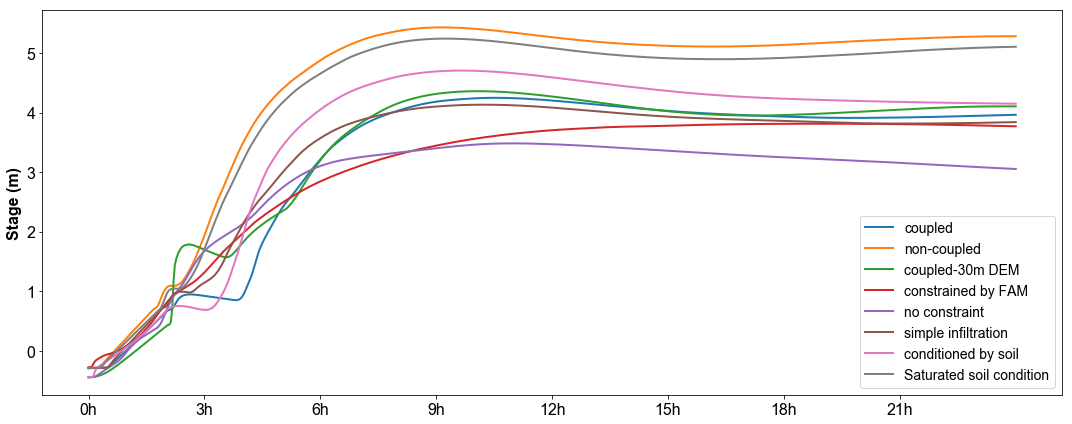

In [370]:
plt.figure(figsize=(15,6))
plt.plot(benchmark.stage.values, label='coupled')
plt.plot(noncoupled_10m.stage.values, label='non-coupled')
plt.plot(coupled_30m.stage.values, label='coupled-30m DEM')
plt.plot(coupled_FAM.stage.values,label='constrained by FAM')
plt.plot(coupled_noConstraint.stage.values,label='no constraint')
plt.plot(infil.stage.values, label='simple infiltration')
plt.plot(soil.stage.values, label='conditioned by soil')
plt.plot(saturated.stage.values, label='Saturated soil condition')
plt.xticks(np.arange(0,24*30,3*30),['%dh'%i for i in np.arange(0,24,3)] )
plt.ylabel('Stage (m)')
plt.legend();

In [8]:
crest= pd.read_csv('../calibration/ts.08076700.crest.csv')

In [10]:
len(crest)

720

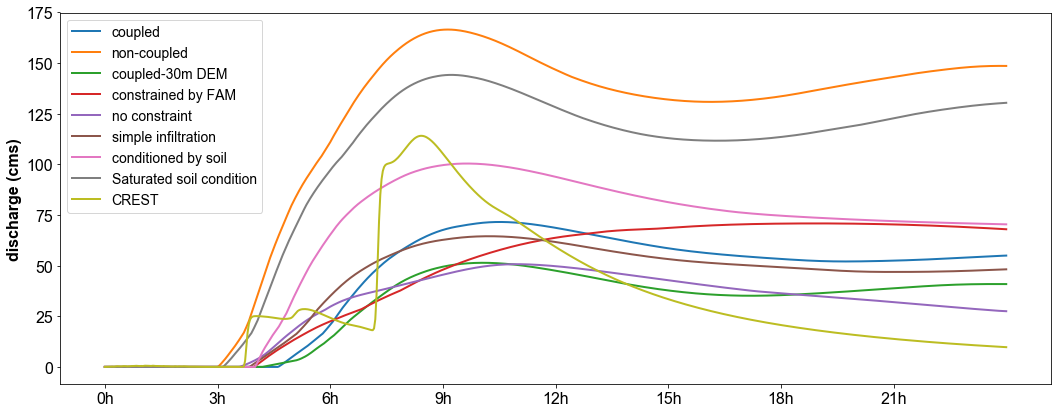

In [18]:
plt.figure(figsize=(15,6))
plt.plot(benchmark.Q.values, label='coupled')
plt.plot(noncoupled_10m.Q.values, label='non-coupled')
plt.plot(coupled_30m.Q.values, label='coupled-30m DEM')
plt.plot(coupled_FAM.Q.values,label='constrained by FAM')
plt.plot(coupled_noConstraint.Q.values,label='no constraint')
plt.plot(infil.Q.values, label='simple infiltration')
plt.plot(soil.Q.values, label='conditioned by soil')
plt.plot(saturated.Q.values, label='Saturated soil condition')
plt.plot(np.append(0, crest.iloc[:,1].values*.1),label='CREST')
plt.xticks(np.arange(0,24*30,3*30),['%dh'%i for i in np.arange(0,24,3)] )
plt.ylabel('discharge (cms)')
plt.legend();